# Apresentação:

    Código referênte a segunda lista de de exercícios
    do curso de análise de regressão.

# Questão 1:

O dado abaixo fornece o número de membros e o número médio de torcedores em jogos do time de futebol Brisbane Lions (Austrália) de 1987 (primeiro ano que competiram) a 2003. Os dirigentes acreditam que há relação entre o número de sócios torcedores (membros) e a arrecadação em dias de jogos. Fonte: The Sunday
Mail newspaper (Brisbane), 15 de junho de 2003, página 119.

In [1]:
# Matrix de dados:
dt <- matrix(c(1987, 3449, 8965, 1988, 7607, 12425, 1989, 7176, 10944, 1990,5630,
8887,1991, 5696, 8012, 1992, 5401, 6499, 1993, 5750, 11097, 1994,
6158, 12437,1995, 6893, 10318, 1996, 10267, 18672, 1997, 16769, 19550,
1998, 16108, 16669,1999, 16931, 22416, 2000, 20295, 27283, 2001, 18330,
28369, 2002, 22288, 27565,2003, 25303, 31400),17,3,byrow=T)

# Convertendo Matriz em dataframe:
df <- data.frame(dt)

# Renomeando colunas:
colnames(df) <- c("Ano","Membros","Torcedores por Jogo")

# Dataframe:
df

Ano,Membros,Torcedores por Jogo
<dbl>,<dbl>,<dbl>
1987,3449,8965
1988,7607,12425
1989,7176,10944
1990,5630,8887
1991,5696,8012
1992,5401,6499
1993,5750,11097
1994,6158,12437
1995,6893,10318


In [2]:
# Sumário dos Dados:
summary(df)

      Ano          Membros      Torcedores por Jogo
 Min.   :1987   Min.   : 3449   Min.   : 6499      
 1st Qu.:1991   1st Qu.: 5750   1st Qu.:10318      
 Median :1995   Median : 7607   Median :12437      
 Mean   :1995   Mean   :11768   Mean   :16559      
 3rd Qu.:1999   3rd Qu.:16931   3rd Qu.:22416      
 Max.   :2003   Max.   :25303   Max.   :31400      

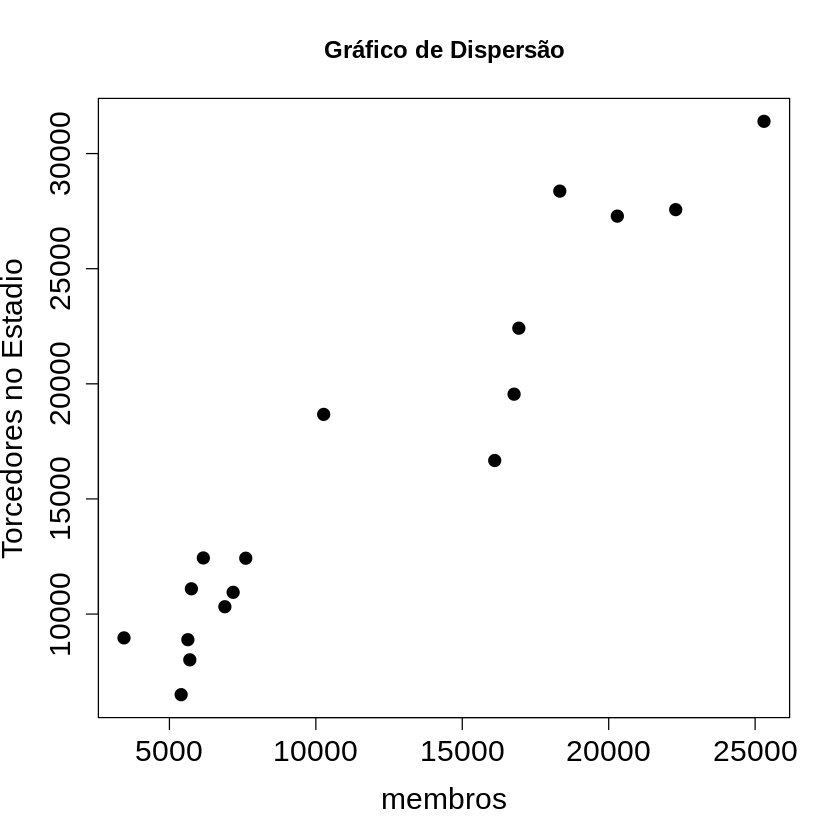

In [3]:
# Gráfico de Dispersão:
plot(df$Membros,df$`Torcedores por Jogo`,pch=20,cex=2,col=1,
     xlab="membros",ylab="Torcedores no Estadio",
     main="Gráfico de Dispersão",cex.lab=1.5,cex.axis=1.5)

(a) Encontre o ajuste por mínimos quadrados.

**Resposta**

Sabemos que o método de estimação dos coeficientes $\hat{\boldsymbol{\beta}}$ pelo **método dos mínimos quadrados** surgem da analise dos resíduos:

$$\large \textbf{S}(\mathbf{\beta}) = \sum_{i=1}^n \epsilon_i^2=\mathbf{\epsilon}'\epsilon=(\textbf{y}-\textbf{X}\beta)'(\textbf{y}-\textbf{X}\mathbf{\beta})$$

De modo que:

$$
\begin{align*}
\frac{\partial S}{\partial \mathbf{\beta}} |_{\hat\beta} = -2\textbf{X'y}&+2\textbf{X'X}\hat\beta=0 \\
\textbf{X'X}\hat\beta&=\textbf{X'y}
\end{align*}$$

Chegando que:
$$\large \hat{\boldsymbol\beta}=(\textbf{X'X}^{-1})\textbf{X'y}$$

    No código vamos utilizar o método lsfit
    para ajustar os coeficientes pelo método
    dos mínimos quadrados.

In [4]:
# Método de ajuste dos coeficientes:
?lsfit

In [5]:
# Recorte das variáveis:
x = df$Membros
y = df$`Torcedores por Jogo`

In [6]:
# Ajuste dos coeficientes:
modelo = lsfit(x,y);modelo$coef

Intercept           X 
3503.538867    1.109456

**Nota:**

    Vale ressaltar que o método aqui usado, "lsfit", não deve ser
    confundido com o método de ajuste de regressão, "lm". Ambos os
    métodos dão informações sobre coeficientes (por parâmetros
    diferentes), mas são métodos diferentes.

(b) Qual a interpretação de $\hat{\beta_0}$ e $\hat{\beta_1}$ neste exemplo?

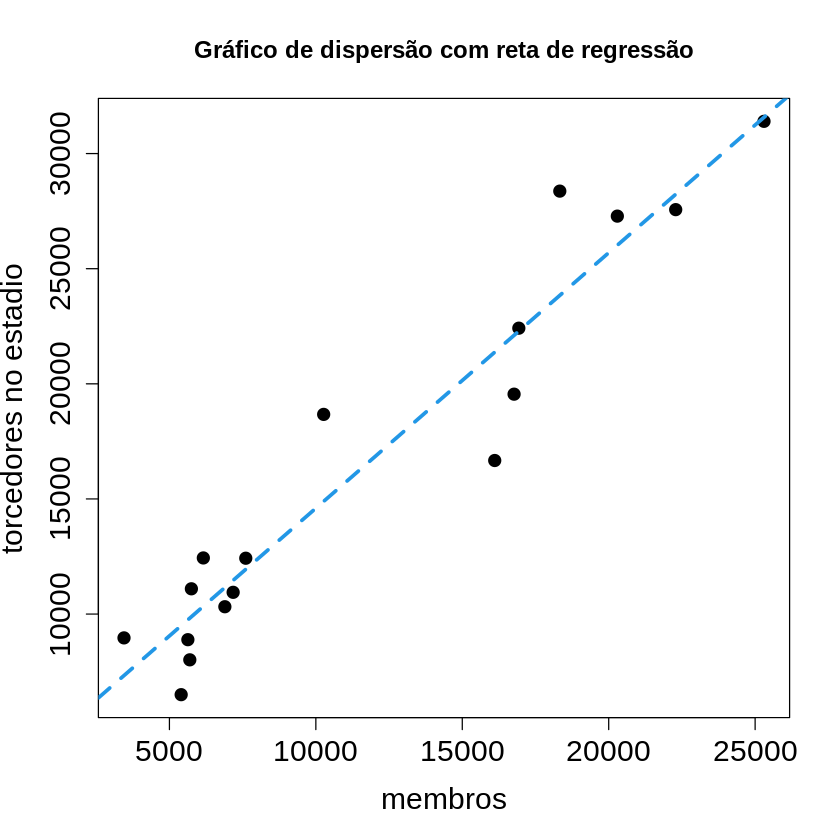

In [7]:
plot(x,y,pch=20,cex=2,col=1,xlab="membros", ylab="torcedores no estadio",
     mai = "Gráfico de dispersão com reta de regressão", cex.lab=1.5, cex.axis=1.5)
     abline(modelo$coef,lwd=3,col=4,lty=2)

**Resposta**

$\hat\beta_0$:

    É onde a reta de regressão corta o eixos das abscissas.

$\hat\beta_1$
  
    É o coeficiente angular da reta de regressão.

**Prevendo Valores**

In [8]:
# Entrada desconhecida:
x0 = 15000

# Calculo da resposta:
y0.hat = modelo$coef[[1]]+(modelo$coef[[2]]*x0);y0.hat

[1] 20145.38

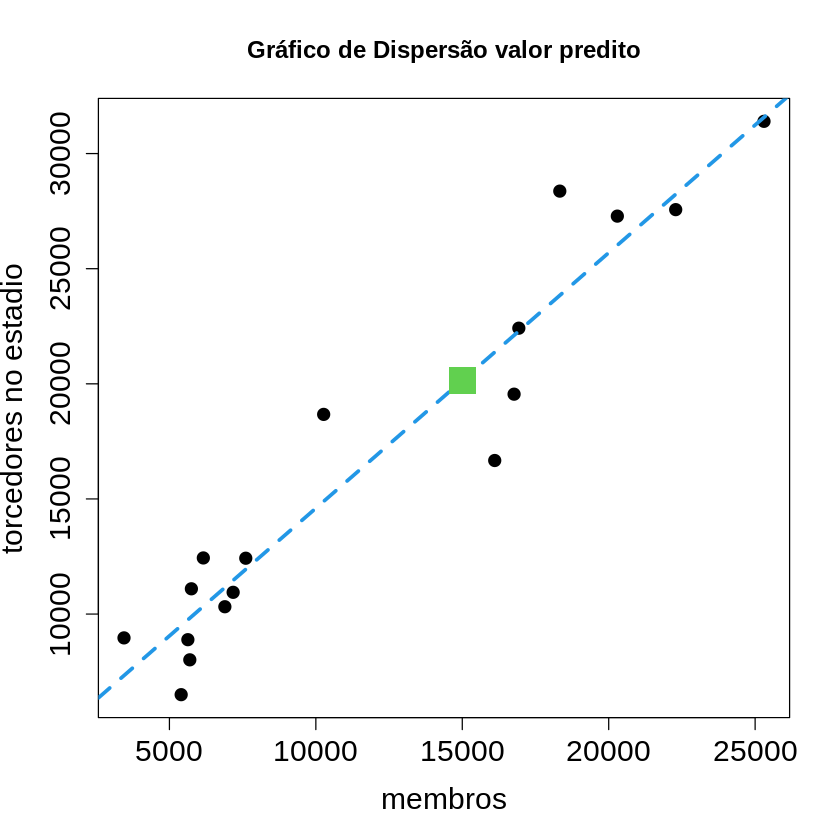

In [9]:
# Visualização da resposta:
plot(x,y,pch=20,cex=2,col=1,xlab="membros",ylab="torcedores no estadio",
     main = "Gráfico de Dispersão valor predito",cex.lab=1.5, cex.axis=1.5)
     abline(modelo$coef,lwd=3,col=4,lty=2)

# Valor Predito:
points(x0,y0.hat,pch=15,col=3,cex=3)

# Questão 2:

Em março de 1984 o jornal Wall Street publicou uma pesquisa na qual 4000 adultos foram entrevistados.
Esses adultos eram consumidores do produto A e foram perguntados se tinham visto um comercial do produto
A na semana anterior. A variável resposta é o número de lembranças por semana e a covariável é o valor
gasto (em milhões de dolares) com propaganda para aquele produto.

In [10]:
empresas <- c("MillerLite","Pepsi","Strohs","FederalExpress","BurgerKing",
"CocaCola","McDonalds","MCI","DietCola","Ford","Levis",
"BudLite","ATTBell","CalvinKlein")

dt <- matrix(c(50.1, 32.1, 74.1, 99.6,19.3, 11.7,22.9, 21.9,82.4,
60.8, 40.1, 78.6,185.9, 92.4,26.9, 50.7,20.4, 21.4,166.2,
40.1, 27, 40.8,45.6, 10.4,154.9, 88.9, 5,12),14,2,byrow=T)

df <- data.frame(empresas,dt)
colnames(df) = c("empresas","valor","lembranca")

df

empresas,valor,lembranca
<chr>,<dbl>,<dbl>
MillerLite,50.1,32.1
Pepsi,74.1,99.6
Strohs,19.3,11.7
FederalExpress,22.9,21.9
BurgerKing,82.4,60.8
CocaCola,40.1,78.6
McDonalds,185.9,92.4
MCI,26.9,50.7
DietCola,20.4,21.4


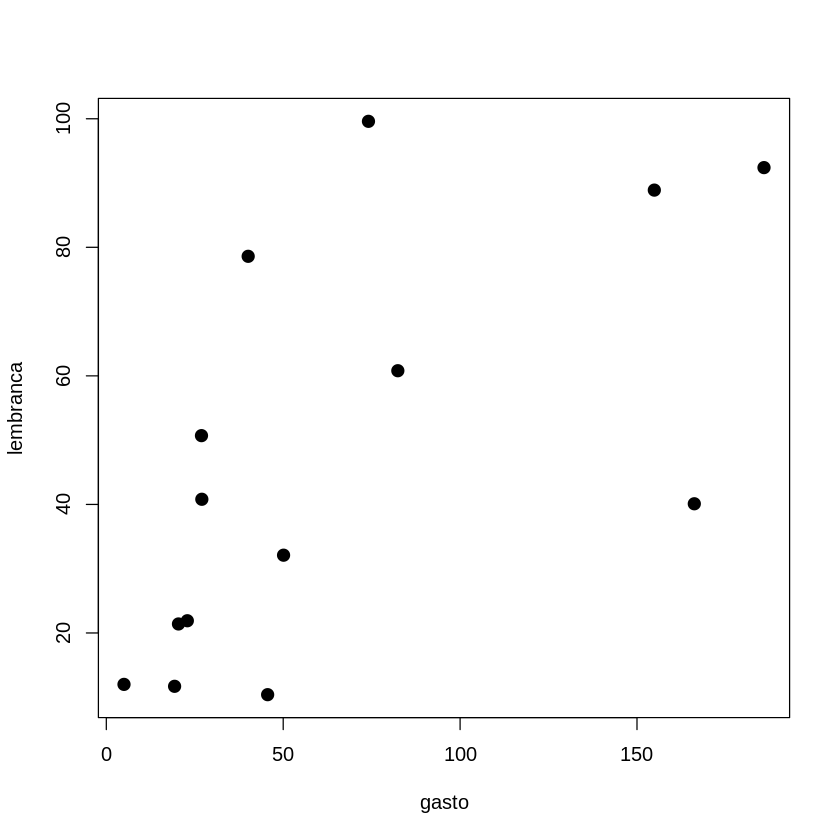

In [11]:
# Visualização dos dados:
plot(df$valor,df$lembranca,xlab="gasto",ylab="lembranca",pch=20,cex=2)

(a) Faça o *scatter plot* dos dados

In [12]:
# Gerando vetores de dados:
x <- df$valor;y <- df$lembranca

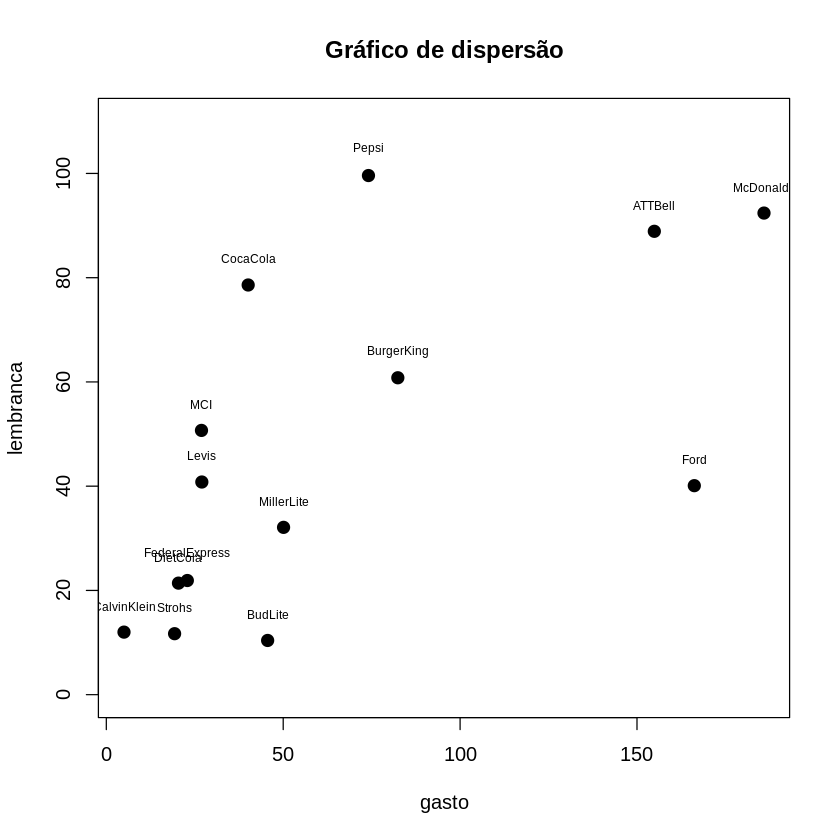

In [13]:
# Visualização:
plot(x,y,xlab="gasto",ylab="lembranca",
     main = "Gráfico de dispersão",
     pch=20,cex=2,ylim=c(0,110))

# legendas dos pontos
text(x,y+5,df$empresas,cex=0.6)

(b) Ajuste o modelo de regressão linear simples para as variáveis

In [14]:
# Ajustando o modelo:
modelo = lsfit(x,y);modelo$coef

Intercept          X 
25.6026014  0.3290221

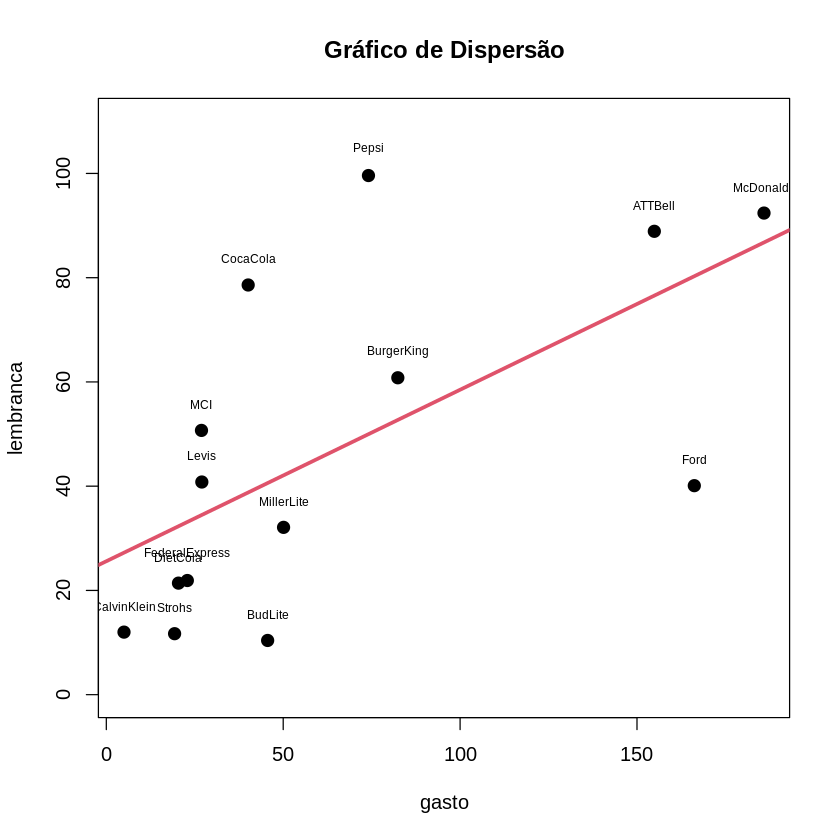

In [15]:
# Grafico de dispersão:
plot(x,y,xlab="gasto",ylab="lembranca",
     main="Gráfico de Dispersão",
     pch=20,cex=2,ylim=c(0,110))

# nome dos pontos:
text(x,y+5,df$empresas,cex=0.6)

# Reta de regressão:
abline(modelo$coef,lwd=3,col=2)

(c) Reajuste o modelo sem considerar as empresas *Pepsi* e *Coca-cola*. Comente os resultados.

In [16]:
# Visualizando o DataFrame:
df

empresas,valor,lembranca
<chr>,<dbl>,<dbl>
MillerLite,50.1,32.1
Pepsi,74.1,99.6
Strohs,19.3,11.7
FederalExpress,22.9,21.9
BurgerKing,82.4,60.8
CocaCola,40.1,78.6
McDonalds,185.9,92.4
MCI,26.9,50.7
DietCola,20.4,21.4


In [17]:
# Gerand novos vetores:
x.novo=x[-c(2,6)]
y.novo=y[-c(2,6)]

In [18]:
# Ajustando novo modelo:
modelo.novo = lsfit(x.novo,y.novo);modelo.novo$coef

Intercept         X 
17.075775  0.345017

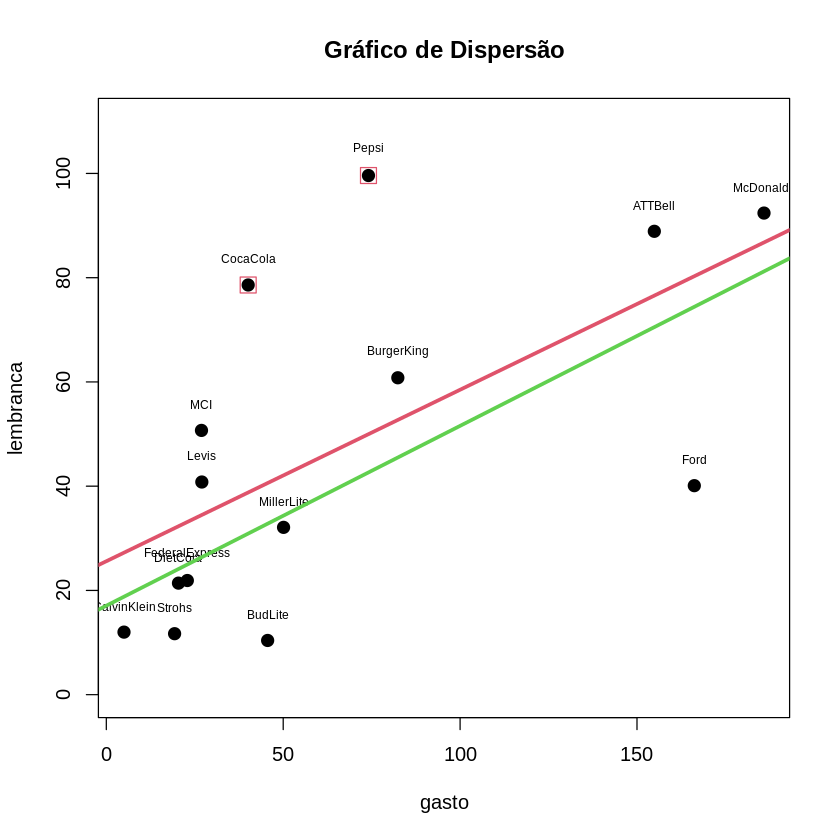

In [19]:
# Gráfico de dispersão:
plot(x,y,xlab="gasto",ylab="lembranca",
     main="Gráfico de Dispersão",
     pch=20,cex=2,ylim=c(0,110))

# Nome dos pontos:
text(x,y+5,df$empresas,cex=0.6)

# Reta de Regressão do modelo total:
abline(modelo$coef,lwd=3,col=2)

# Reta de Regressão do modelo novo:
abline(modelo.novo$coef,lwd=3,col=3)


# Destacamento dos pontos retirados:
points(x[c(2,6)],y[c(2,6)],pch=22,col=2,cex=2)

(d) Vimos que para prever novas observações, por exemplo para um novo valor $x_0$, podemos usar a estimativa
pontual $\hat{y_0}=\hat{\beta_0}+\hat{\beta_1}x_0$. A Polaroid gastou com propaganda **26.9 milhões**, encontre uma estimativa
pontual para o número de lembrançaas por semana para essa empresa baseado no ajuste em (c).

In [20]:
# Novo Valor:
x0 = 26.9

In [21]:
# Valores encontrados:
y0.hat <- modelo$coef[[1]]+(modelo$coef[[2]]*x0)
y0.hat.novo <- modelo.novo$coef[[1]]+(modelo.novo$coef[[2]]*x0)

sprintf("Temos então a resposta %f para como predição do modelo1 e %f do modelo2", y0.hat, y0.hat.novo)

[1] "Temos então a resposta 34.453297 para como predição do modelo1 e 26.356732 do modelo2"

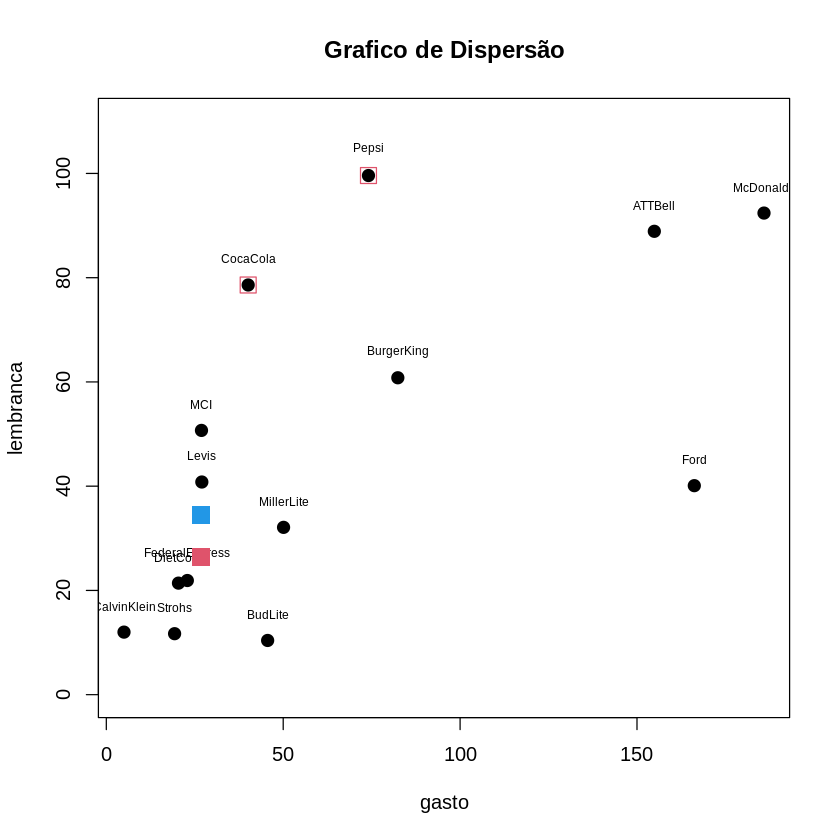

In [22]:
# Visualização:
#Gráfico de dispersão:
plot(x,y,xlab="gasto",ylab="lembranca",
     main="Grafico de Dispersão",pch=20,cex=2,ylim=c(0,110))

# Nome dos pontos:
text(x,y+5,empresas,cex=0.6)

# Previsão modelo1:
points(x0,y0.hat,pch=15,col=4,cex=2)

# Previsão modelo2
points(x0,y0.hat.novo,pch=15,col=2,cex=2)

# Destacamento dos pontos retirados:
points(x[c(2,6)],y[c(2,6)],pch=22,col=2,cex=2)

# Questão 3:

Um estudo sobre os níveis de ozônio na costa sul da Califórnia para os anos de 1980 a 1991 calculou o número
de dias que os níveis de ozônio passaram de 0.20ppm. O pesquisador acredita que o número de dias depende
de um índice meteorológico que é calculado fornecido a cada ano. Dados:

In [24]:
# Vetor de anos:
anos <- 1980:1991

# Dados:
y <- c(88,91,58,82,81,65,61,48,61,43,33,36)
x <- c(17.2,18.2,16.0,17.2,18.0,17.2,16.9,17.1,18.2,17.3,17.5,16.6)

# DataFrame:
df <- data.frame()

(a) Quais são as variáveis resposta e covariável? Faça o scatter plot dos dados;

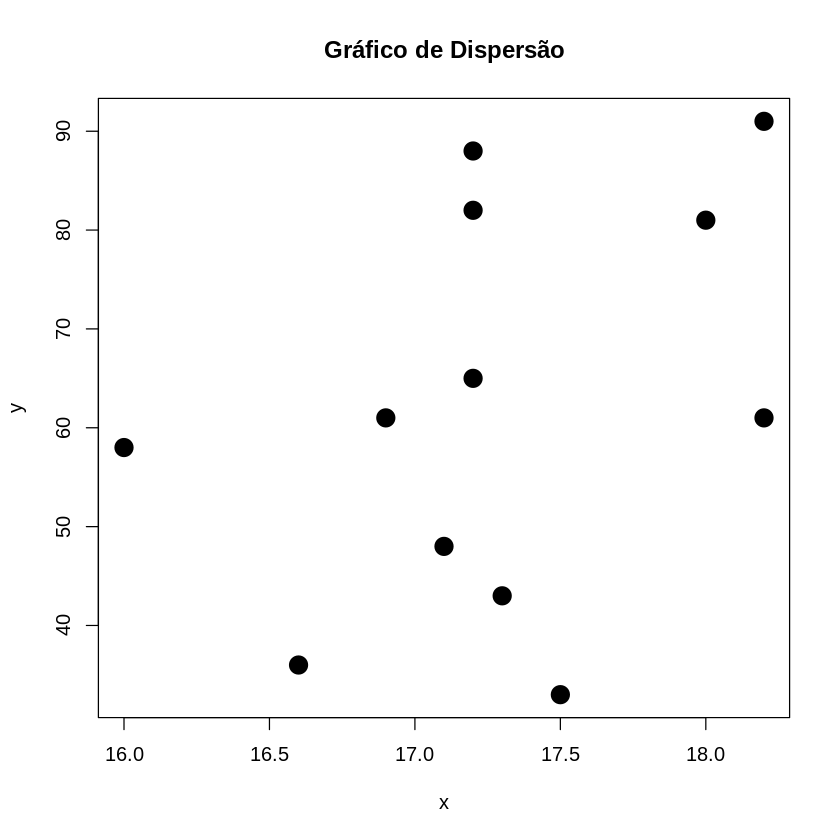

In [30]:
# Visualização:
plot(x,y,main="Gráfico de Dispersão",pch=20,cex=3)

(b) Encontre os estimadores de mínimos quadrados para o modelo de regressão linear simples;

In [33]:
#Ajustanodo o modelo:
modelo <- lsfit(x,y)
sprintf('Intercept: %.2f, Coeficiente Angular:%.2f',modelo$coef[[1]],modelo$coef[[2]])

[1] "Intercept: -144.28, Coeficiente Angular:11.95"

(c) Construa o gráfico da reta ajustada de mínimos quadrados.

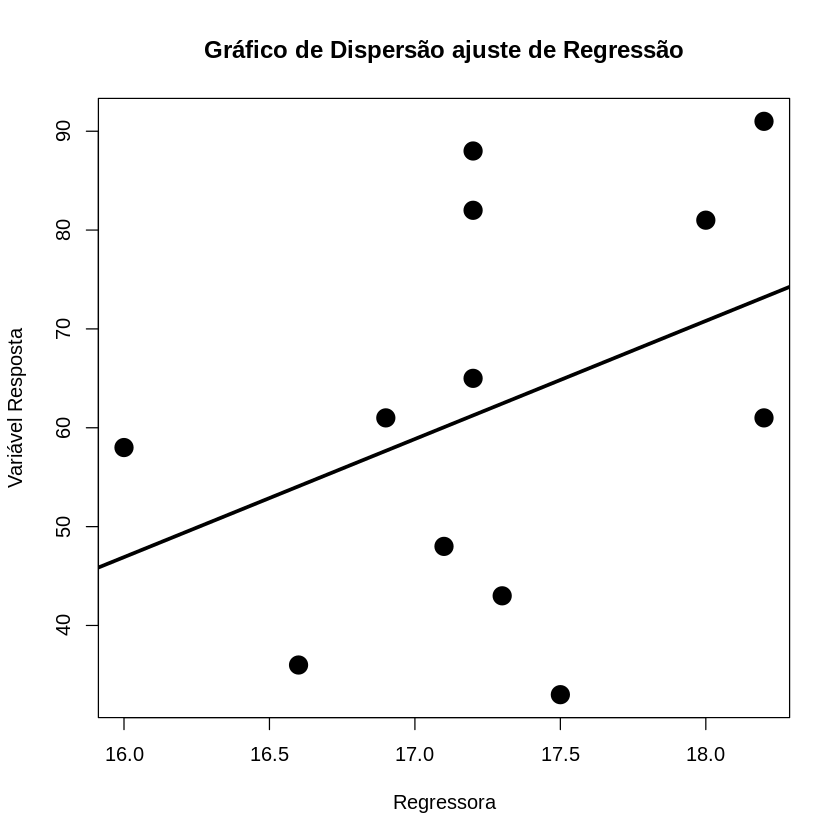

In [49]:
# gráfico de dispersão:
plot(x,y,xlab="Regressora",ylab="Variável Resposta",main="Gráfico de Dispersão ajuste de Regressão",pch=20,cex=3)
abline(lsfit(x,y)$coef,lwd=3)

(d) Construa o gráfico do tempo versus os resíduos; Comente os resultados.

In [47]:
# Calculando os residuos:
residuos = modelo$res

# Indices:
i = 1 # indice
for (residuo in residuos)
{
  cat(sprintf("[%i] %f\n",i,residuo))
  i = i + 1
}

[1] 26.745794
[2] 17.796269
[3] 11.085223
[4] 20.745794
[5] 10.186174
[6] 3.745794
[7] 3.330651
[8] -12.059254
[9] -12.203731
[10] -19.449159
[11] -31.839064
[12] -18.084492


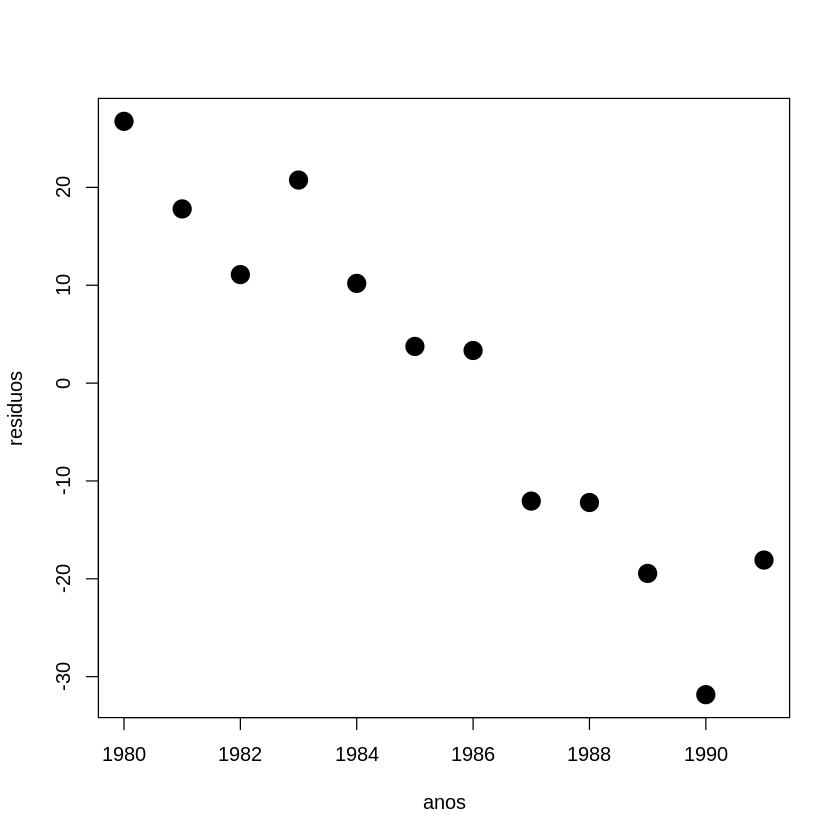

In [48]:
# Visualização:
plot(anos,residuos,main="anos x residuos",pch=20,cex=3)

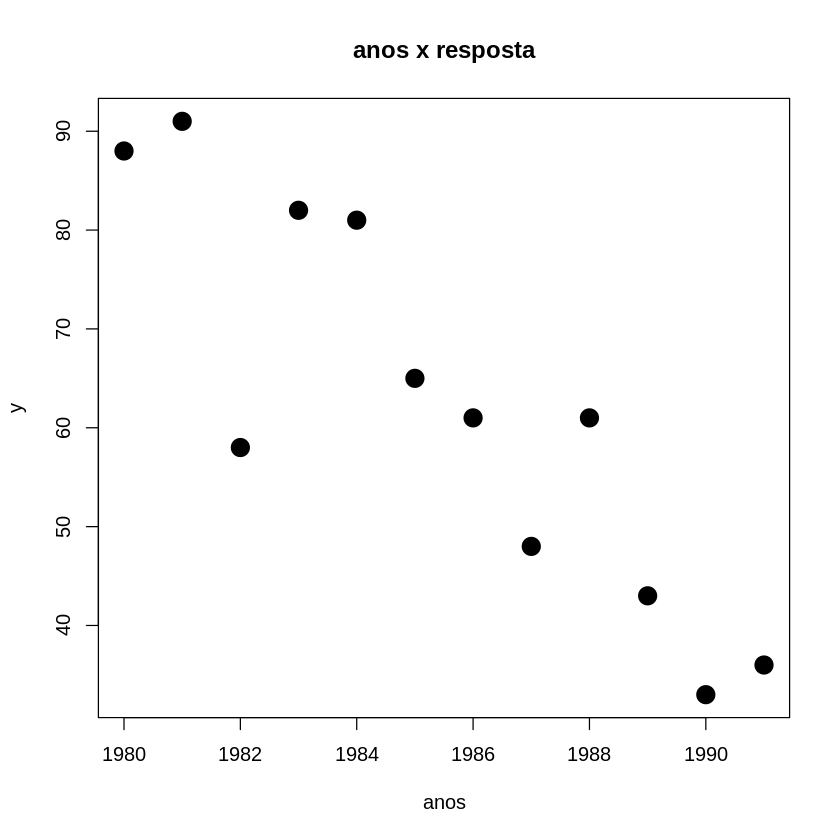

In [51]:
# gráfico:
plot(anos,y,main="anos x resposta",pch=20,cex=3)